In [1]:
#import the necessary liblaries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import os
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import warnings

# Tensorflow and Keras Modules
import tensorflow as tf # type: ignore
from keras.utils import load_img # type: ignore
from keras.models import Sequential, Model # type: ignore
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input # type: ignore
from tensorflow.keras.preprocessing.image import img_to_array # type: ignore
from tensorflow.keras.utils import plot_model # type: ignore
#import pillow lib
from PIL import Image # type: ignore

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Explicitly set the path to Graphviz's bin directory
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [3]:
#directory
BASE_DIR = r'C:\Users\girli\EC_Utbildning\Deep_Learning_Kunskapskontroll_2\Final\Age_Gender_UTK_Dataset\UTKFace'

# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

In [4]:
#create a loop for all dataset images
for filename in (os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    #get age from 0
    age = int(temp[0])
    #get gender from 1
    gender = int(temp[1])
    #append all
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [5]:
#chek the image paths
image_paths

['C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\UTKFace\\100_0_0_20170112213500903.jpg.chip.jpg',
 'C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\UTKFace\\100_0_0_20170112215240346.jpg.chip.jpg',
 'C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\UTKFace\\100_1_0_20170110183726390.jpg.chip.jpg',
 'C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\UTKFace\\100_1_0_20170112213001988.jpg.chip.jpg',
 'C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\UTKFace\\100_1_0_20170112213303693.jpg.chip.jpg',
 'C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\UTKFace\\100_1_0_20170112215032192.jpg.chip.jpg',
 'C:\\Users\\girli\\EC_Utbildning\\Deep_Learning_Kunskapskontroll_2\\Final\\Age_Gender_UTK_Dataset\\

In [6]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100       0
1  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100       0
2  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100       1
3  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100       1
4  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100       1

In [7]:
# change the label of the gender
gender_dict = {0:'Male', 1:'Female'}

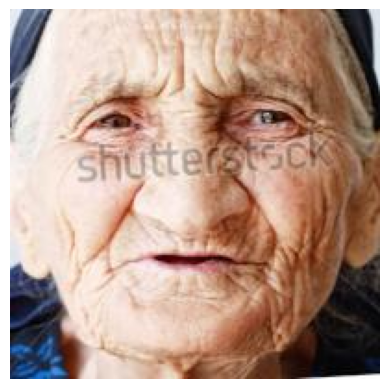

In [8]:
#open the second image
img = Image.open(df['image'][2])
plt.axis('off')
#show it
plt.imshow(img);

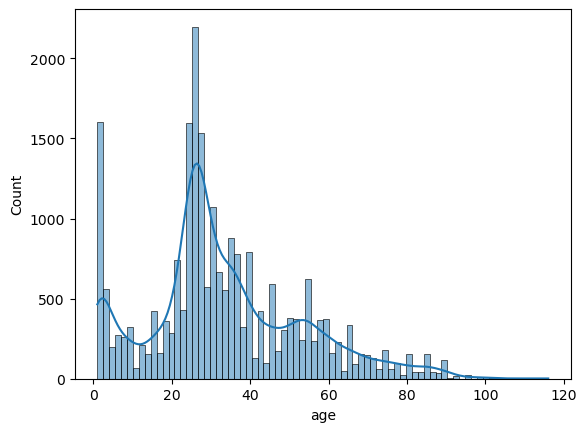

In [9]:
# Visualize the age distribution using histplot
sns.histplot(df['age'], kde=True)

# Show the plot
plt.show()

                                               image  age  gender
0  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100    Male
1  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100    Male
2  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100  Female
3  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100  Female
4  C:\Users\girli\EC_Utbildning\Deep_Learning_Kun...  100  Female


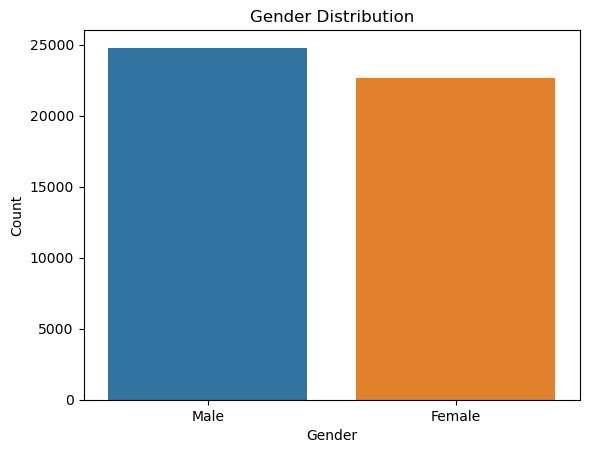

In [10]:
# Create a loop to iterate over all dataset images
for filename in os.listdir(BASE_DIR):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    # Ensure that the filename follows the pattern 'age_gender_image.ext'
    if len(temp) >= 2:
        try:
            # Get age from the filename
            age = int(temp[0])
            # Get gender from the filename
            gender = int(temp[1])
            # Append to lists
            image_paths.append(image_path)
            age_labels.append(age)
            gender_labels.append(gender)
        except ValueError:
            # If age or gender is not an integer, skip this file
            continue

# Convert to DataFrame
df = pd.DataFrame({
    'image': image_paths,
    'age': age_labels,
    'gender': gender_labels
})

# Ensure gender labels are 'Male' and 'Female' in the DataFrame
gender_dict = {0: 'Male', 1: 'Female'}
df['gender'] = df['gender'].map(gender_dict)

# Display the DataFrame to check if gender mapping is correct
print(df.head())

# Check if gender column is mapped correctly and not empty
if not df['gender'].isnull().all():
    sns.countplot(x='gender', data=df)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Gender Distribution')
    plt.show()
else:
    print("Error: 'gender' column is empty or not properly mapped")

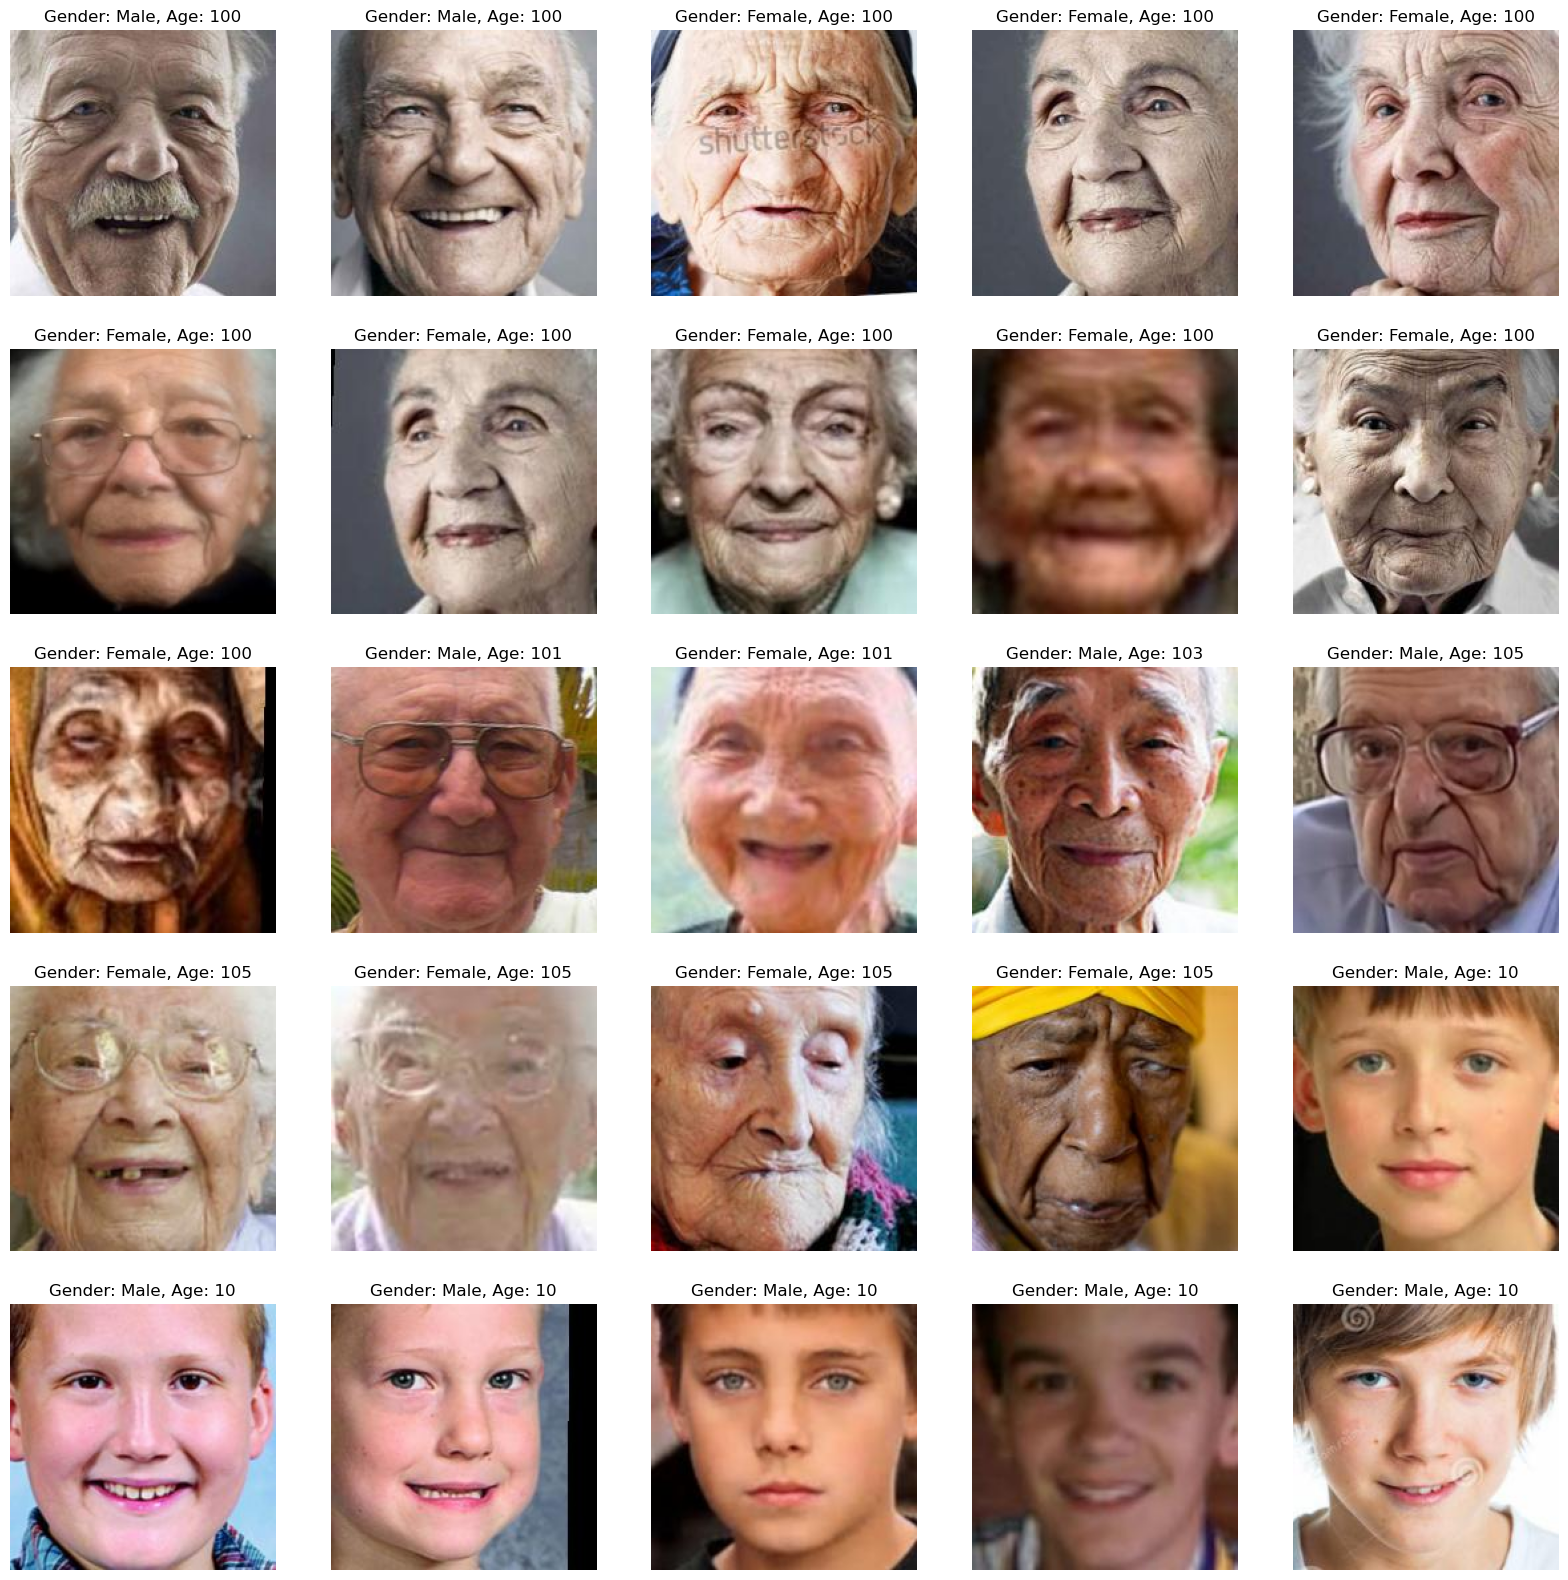

In [11]:
# Show some examples
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, row in files.iterrows():
    file = row['image']
    age = row['age']
    gender = row['gender']
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Gender: {gender}, Age: {age}")
    plt.axis('off')

plt.show()

In [12]:
# Function to extract features from images
def extract_features(images):
    features = []
    for image in images:
        # Load image in grayscale mode
        img = load_img(image, color_mode='grayscale')
        # Resize to 128x128
        img = img.resize((128, 128))
        # Convert image to array
        img_array = img_to_array(img)
        # Normalize the image
        img_array = img_array.astype('float32') / 255.0
        features.append(img_array)
    return np.array(features)

# Example usage
X = extract_features(df['image'])
print(X.shape)

(47416, 128, 128, 1)


In [13]:
# make normalisation 0-1
X = X/255.0

In [14]:
# Convert 'gender' and 'age' columns to NumPy arrays
y_gender = np.array(df['gender'].map({'Male': 0, 'Female': 1}), dtype=np.int32)
y_age = np.array(df['age'], dtype=np.float32)

# Load and preprocess images
image_paths = df['image'].tolist()
X = []

for image_path in image_paths:
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    X.append(img_array)

X = np.array(X, dtype=np.float32)
print(X.shape, y_gender.shape, y_age.shape)
print(X.dtype, y_gender.dtype, y_age.dtype)

(47416, 128, 128, 3) (47416,) (47416,)
float32 int32 float32


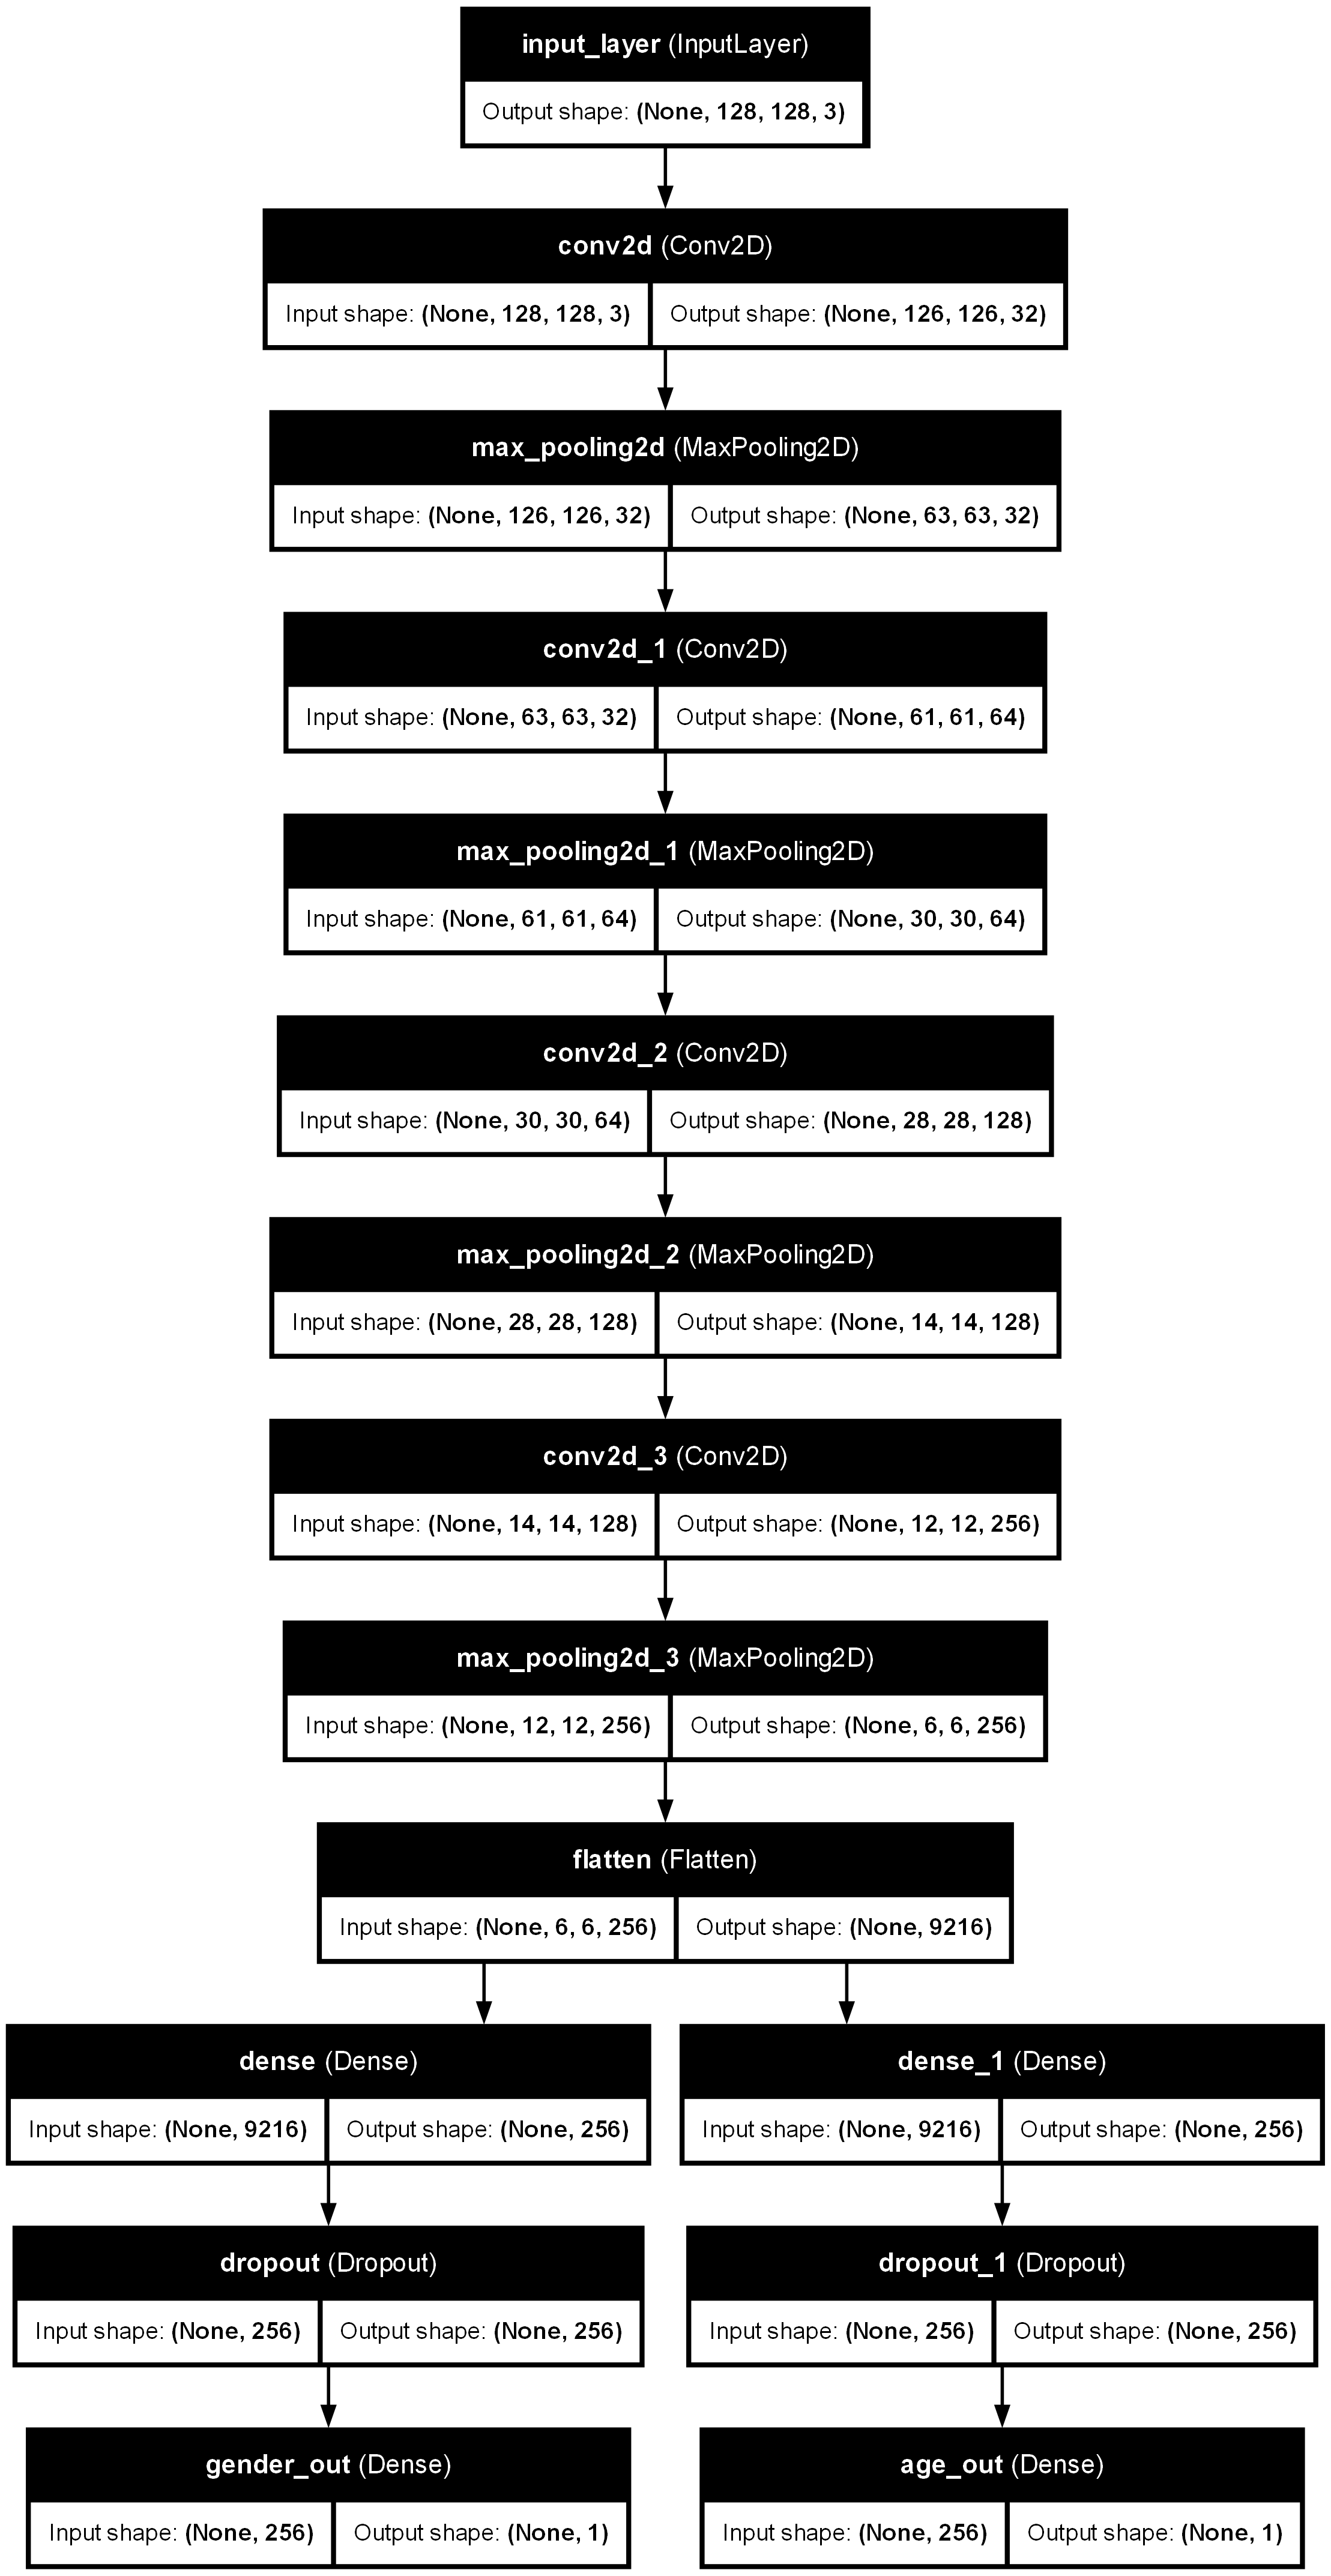

In [15]:
# Create Model
input_shape = (128, 128, 3)  # Adjust input shape to RGB images

# Define the model architecture
inputs = Input(shape=input_shape)
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(maxp_4)

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

# Two outputs
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=inputs, outputs=[output_1, output_2])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
# Compile the model with appropriate loss functions and optimizer
model.compile(optimizer='adam', 
              loss={'gender_out': 'binary_crossentropy', 'age_out': 'mse'},
              metrics={'gender_out': 'accuracy', 'age_out': 'mae'})

# Summarize the model
print(model.summary())
print(X.shape, y_gender.shape, y_age.shape)
print(X.dtype, y_gender.dtype, y_age.dtype)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 63, 63,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 30, 30,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 12, 12,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 9216)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  2,359,552 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  2,359,552 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_out (Dense)  │ (None, 1)         │        257 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,108,034 (19.49 MB)

 Trainable params: 5,108,034 (19.49 MB)

 Non-trainable params: 0 (0.00 B)

None
(47416, 128, 128, 3) (47416,) (47416,)
float32 int32 float32


In [17]:
# Fit the model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 309s 253ms/step - age_out_mae: 12.7901 - gender_out_accuracy: 0.5629 - loss: 313.7365 - val_age_out_mae: 11.9875 - val_gender_out_accuracy: 0.7946 - val_loss: 238.2189
Epoch 2/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 280s 236ms/step - age_out_mae: 7.9457 - gender_out_accuracy: 0.7971 - loss: 124.7623 - val_age_out_mae: 13.9438 - val_gender_out_accuracy: 0.8272 - val_loss: 287.1474
Epoch 3/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 282s 238ms/step - age_out_mae: 6.8883 - gender_out_accuracy: 0.8309 - loss: 92.7589 - val_age_out_mae: 8.9341 - val_gender_out_accuracy: 0.8521 - val_loss: 127.9462
Epoch 4/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 291s 245ms/step - age_out_mae: 6.3436 - gender_out_accuracy: 0.8539 - loss: 78.7392 - val_age_out_mae: 10.9900 - val_gender_out_accuracy: 0.8619 - val_loss: 186.2389
Epoch 5/30
1186/1186 ━━━━━━━━━━━━━━━━━━━━ 287s 242ms/step - age_out_mae: 5.9319 - gender_out_accuracy: 0.8613 - loss: 68.1973 - val_age_out_mae: 10.1830 - val_gender_

In [18]:
model.save("gender_age_detection_model.keras")

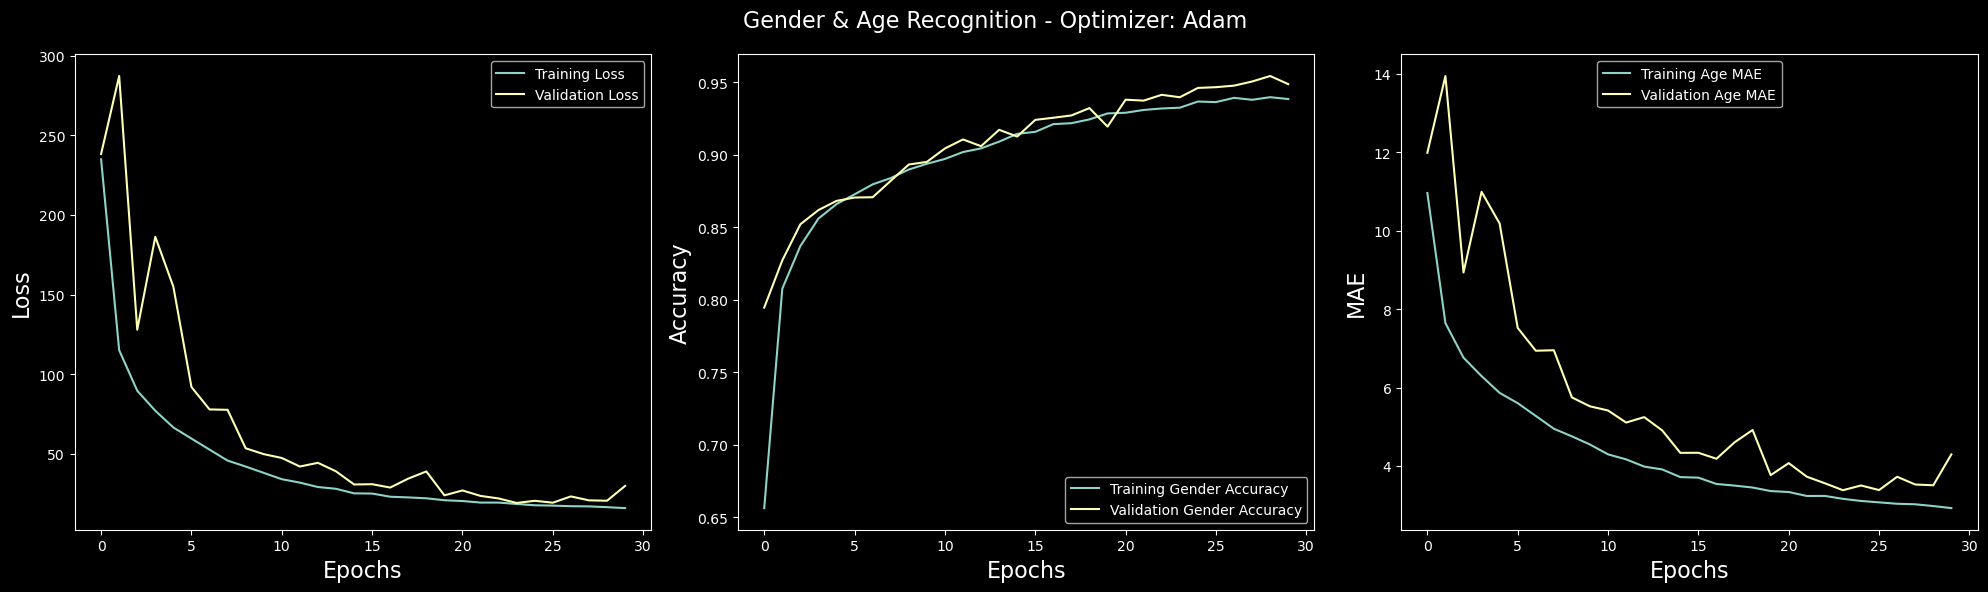

In [67]:
# Plot Results
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))

# Plot loss
plt.subplot(1, 3, 1)
plt.suptitle('Gender & Age Recognition - Optimizer: Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plot gender accuracy
plt.subplot(1, 3, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history.history['gender_out_accuracy'], label='Training Gender Accuracy')
plt.plot(history.history['val_gender_out_accuracy'], label='Validation Gender Accuracy')
plt.legend(loc='lower right')

# Plot age MAE
plt.subplot(1, 3, 3)
plt.ylabel('MAE', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(history.history['age_out_mae'], label='Training Age MAE')
plt.plot(history.history['val_age_out_mae'], label='Validation Age MAE')
plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

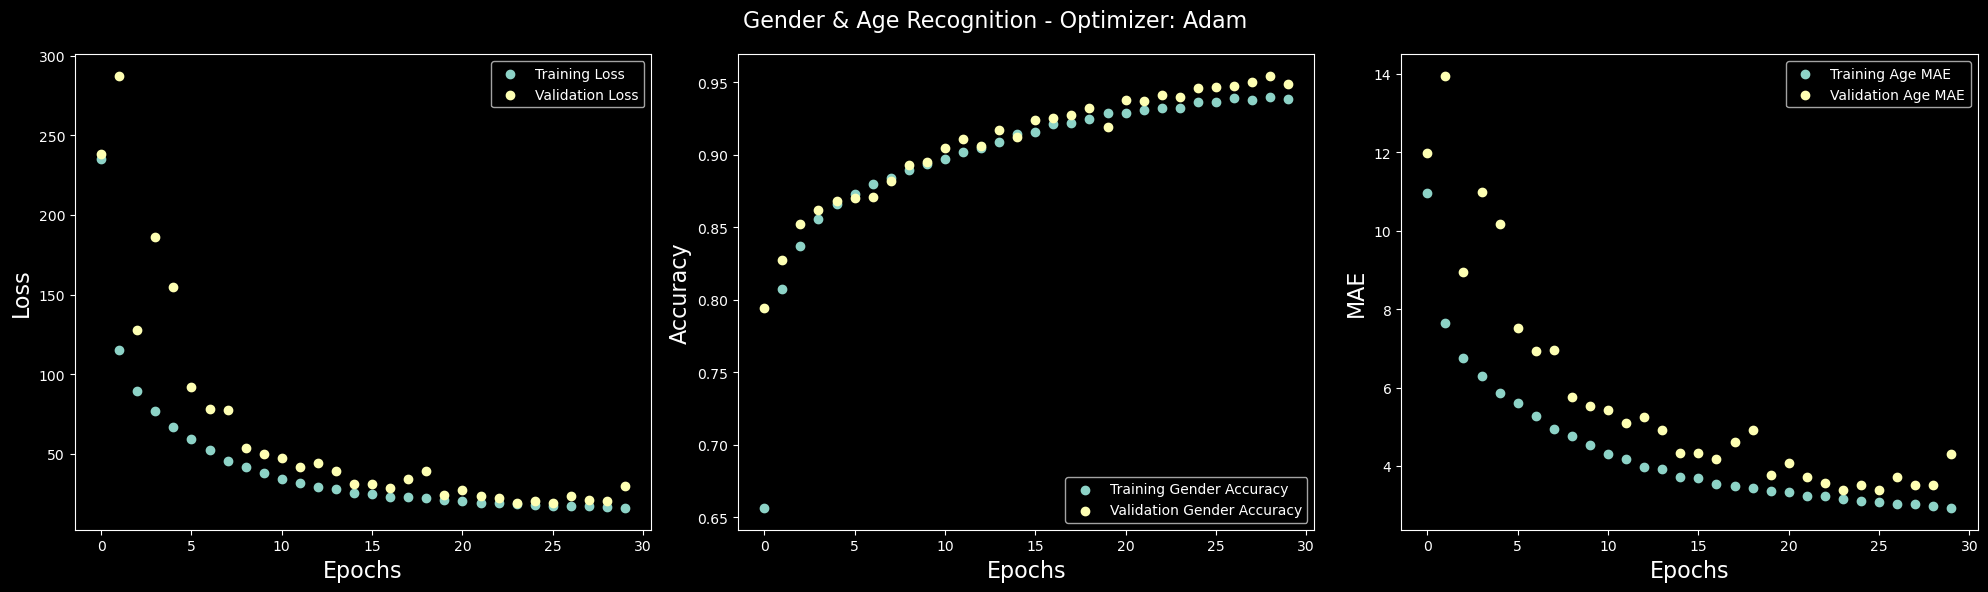

In [74]:
# Plot Results
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))

# Plot loss
plt.subplot(1, 3, 1)
plt.suptitle('Gender & Age Recognition - Optimizer: Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.scatter(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.scatter(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plot gender accuracy
plt.subplot(1, 3, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.scatter(range(len(history.history['gender_out_accuracy'])), history.history['gender_out_accuracy'], label='Training Gender Accuracy')
plt.scatter(range(len(history.history['val_gender_out_accuracy'])), history.history['val_gender_out_accuracy'], label='Validation Gender Accuracy')
plt.legend(loc='lower right')

# Plot age MAE
plt.subplot(1, 3, 3)
plt.ylabel('MAE', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.scatter(range(len(history.history['age_out_mae'])), history.history['age_out_mae'], label='Training Age MAE')
plt.scatter(range(len(history.history['val_age_out_mae'])), history.history['val_age_out_mae'], label='Validation Age MAE')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


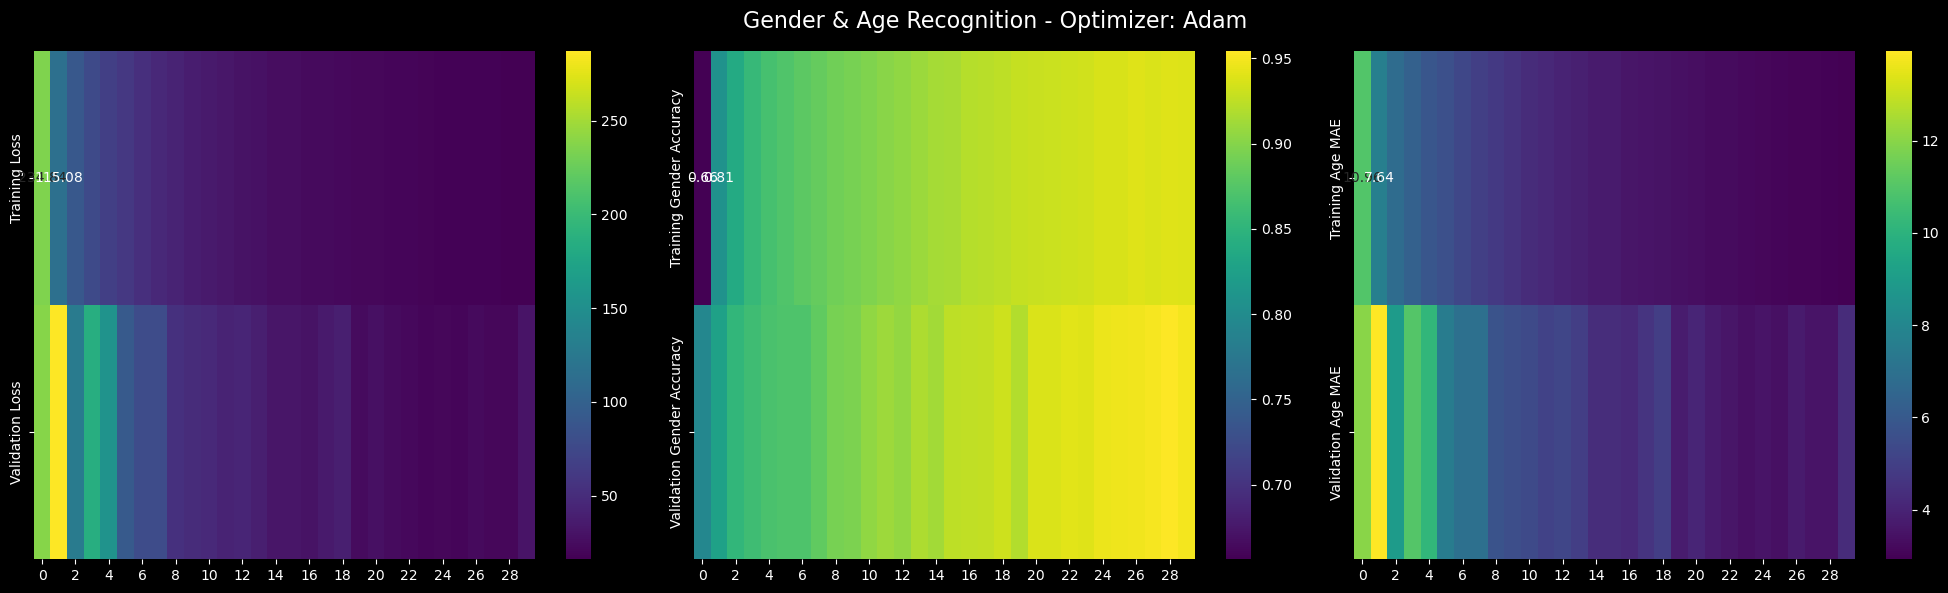

In [86]:
# Plot Results
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))

# Plot loss
plt.subplot(1, 3, 1)
plt.suptitle('Gender & Age Recognition - Optimizer: Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
sns.heatmap([history.history['loss'], history.history['val_loss']], annot=True, fmt=".2f", cmap='viridis', xticklabels='auto', yticklabels=['Training Loss', 'Validation Loss'])

# Plot gender accuracy
plt.subplot(1, 3, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
sns.heatmap([history.history['gender_out_accuracy'], history.history['val_gender_out_accuracy']], annot=True, fmt=".2f", cmap='viridis', xticklabels='auto', yticklabels=['Training Gender Accuracy', 'Validation Gender Accuracy'])

# Plot age MAE
plt.subplot(1, 3, 3)
plt.ylabel('MAE', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
sns.heatmap([history.history['age_out_mae'], history.history['val_age_out_mae']], annot=True, fmt=".2f", cmap='viridis', xticklabels='auto', yticklabels=['Training Age MAE', 'Validation Age MAE'])

plt.tight_layout()
plt.show()